## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
total_mice = combined_data["Mouse ID"].count()
total_mice

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice = combined_data.loc[combined_data.duplicated(subset=["Mouse ID", "Timepoint",]),"Mouse ID"].unique()

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mice_data = combined_data[combined_data["Mouse ID"].isin(dup_mice)==False]

In [6]:
# Checking the number of mice in the clean DataFrame.
clean_data = mice_data["Mouse ID"].value_counts()
clean_mice = len(clean_data)
clean_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mice_mean = mice_data.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
mice_median = mice_data.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
mice_variance = mice_data.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
mice_std = mice_data.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
mice_sem = mice_data.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

mice_group = pd.DataFrame({"Mean": mice_mean, "Median": mice_median, "Variance": mice_variance, "STD": mice_std, "SEM": mice_sem})
mice_group

,Mean,Median,Variance,STD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
single_line = mice_data.groupby("Drug Regimen")
stat_sum = single_line.agg(["mean","median","var","std","sem"])["Tumor Volume (mm3)"]
stat_sum

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

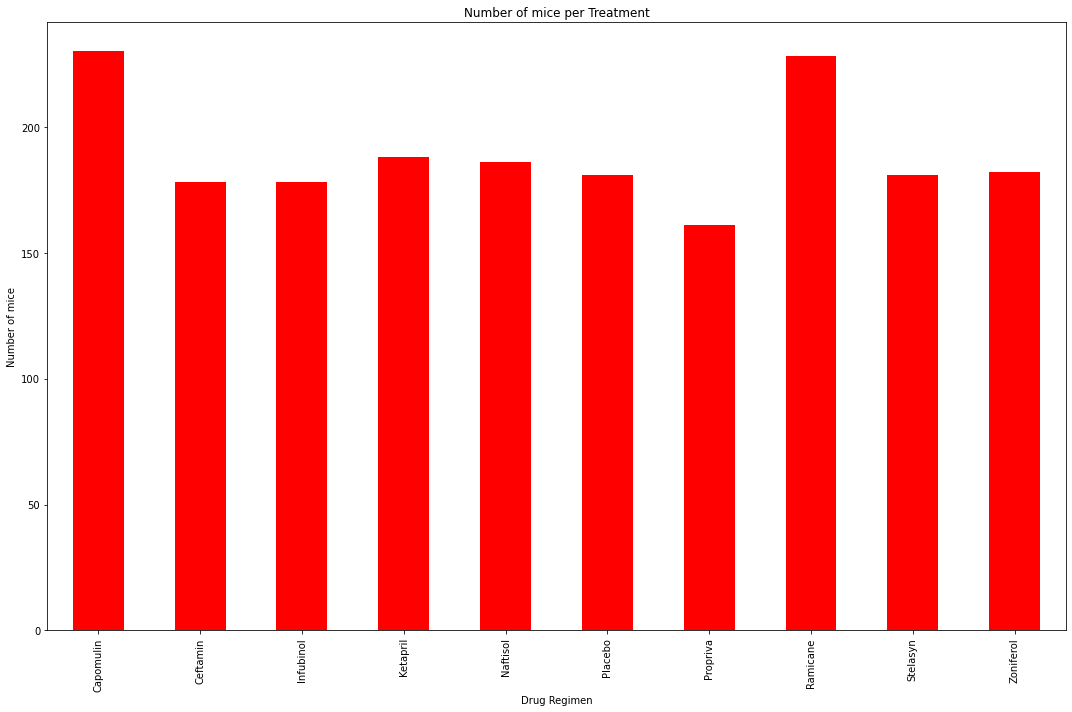

In [25]:
# Generate a barplot showing the total number of measurements taken on each drug regimen using pandas.
mice_count = combined_data.groupby(["Drug Regimen"]).count()["Mouse ID"]

plot_pandas = mice_count.plot.bar(figsize=(15,10), color='r')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of mice")
plt.title("Number of mice per Treatment")
plt.tight_layout()
plt.show()




Text(0.5, 1.0, 'Number of mice per Treatment')

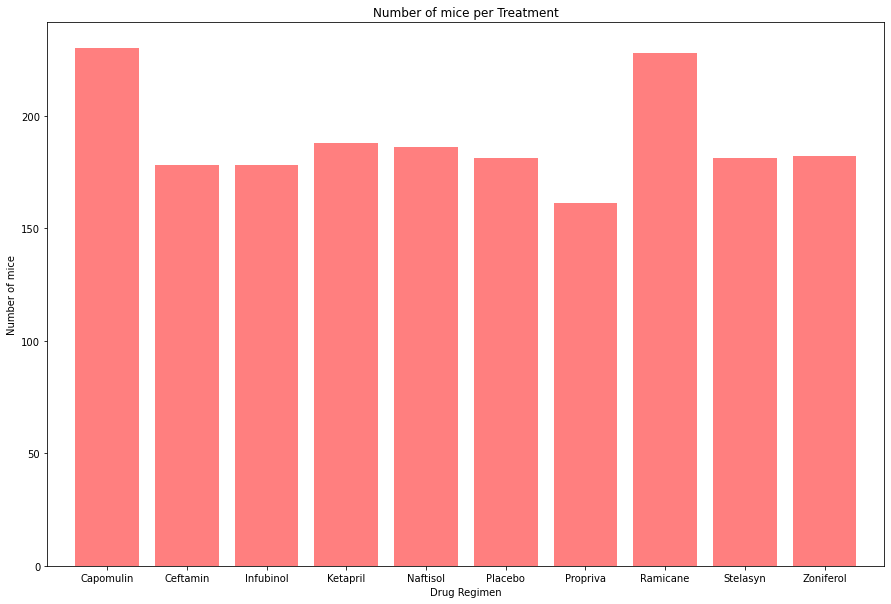

In [26]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
mice_bar = (combined_data.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()
x_axis = np.arange(len(mice_count))
fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.bar(x_axis, mice_bar, color='r', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo","Propriva","Ramicane", "Stelasyn", "Zoniferol"])
plt.xlim(-0.75, len(x_axis)-0.25)
plt.xlabel("Drug Regimen",)
plt.ylabel("Number of mice")
plt.title("Number of mice per Treatment")

Text(0, 0.5, 'Sex')

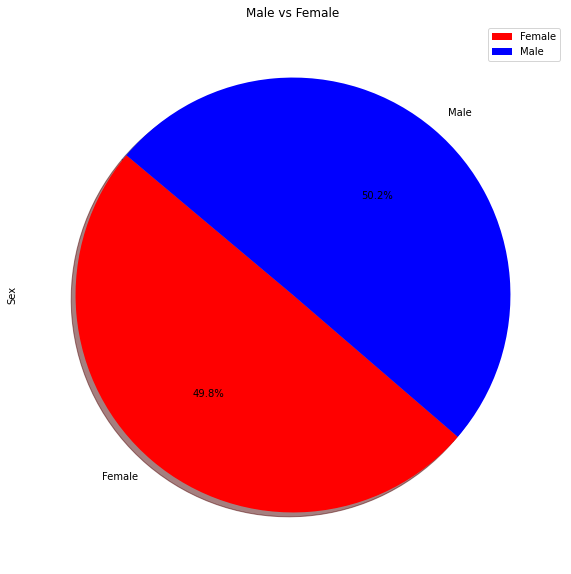

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_count = combined_data.groupby(["Mouse ID","Sex"])
sex_df = pd.DataFrame(sex_count.size())
gender_count = pd.DataFrame(sex_df.groupby(["Sex"]).count())
gender_count.columns = ["Count"]
gender_count["Percentage"] = (100*(gender_count["Count"]/gender_count["Count"].sum()))
gender_count

colors= ["red", "blue"]
plot = gender_count.plot.pie(y="Count",figsize=(15,10), colors = colors, startangle=140, shadow = True, autopct="%1.1f%%")
plt.title("Male vs Female")
plt.ylabel("Sex")


Text(0, 0.5, 'Sex')

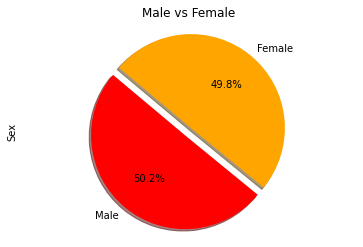

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
sizes = [50.2, 49.8]
colors = ["red", "orange"]
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("Male vs Female")
plt.ylabel("Sex")


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin = combined_data.loc[combined_data["Drug Regimen"] == "Capomulin",:]
ramicane = combined_data.loc[combined_data["Drug Regimen"] == "Ramicane",:]
infubinol = combined_data.loc[combined_data["Drug Regimen"] == "Infubinol",:]
ceftamin = combined_data.loc[combined_data["Drug Regimen"] == "Ceftamin",:]
# Start by getting the last (greatest) timepoint for each mouse
drug_max = capomulin.groupby("Mouse ID").max()["Timepoint"]

# Merge this group df with the originafl dataframe to get the tumor volume at the last timepoint
drug_reg = pd.DataFrame(drug_max)
drug_merge = pd.merge(drug_reg, combined_data, on=("Mouse ID", "Timepoint"),how="left")
drug_merge

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2
5,i557,45,Capomulin,Female,1,24,47.685963,1
6,i738,45,Capomulin,Female,23,20,37.311846,2
7,j119,45,Capomulin,Female,7,23,38.125164,1
8,j246,35,Capomulin,Female,21,21,38.753265,1
9,l509,45,Capomulin,Male,17,21,41.483008,3


In [14]:
#data frame for capomulin
drug1 = drug_merge["Tumor Volume (mm3)"]
quartiles = drug1.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of capomulin is: {lowerq}")
print(f"The upper quartile of capomulin is is: {upperq}")
print(f"The interquartile range of capomulin is: {iqr}")
print(f"The the median of capomulin is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of capomulin is: 32.37735684
The upper quartile of capomulin is is: 40.1592203
The interquartile range of capomulin is: 7.781863460000004
The the median of capomulin is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [15]:
drug2_max = ramicane.groupby("Mouse ID").max()["Timepoint"]

# Merge this group df with the originafl dataframe to get the tumor volume at the last timepoint
drug2_reg = pd.DataFrame(drug2_max)
drug2_merge = pd.merge(drug2_reg, combined_data, on=("Mouse ID", "Timepoint"),how="left")
drug2_merge

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2
5,c758,45,Ramicane,Male,9,17,33.397653,1
6,d251,45,Ramicane,Female,8,19,37.311236,2
7,e662,45,Ramicane,Male,8,24,40.659006,2
8,g791,45,Ramicane,Male,11,16,29.128472,1
9,i177,45,Ramicane,Male,10,18,33.562402,3


In [16]:
#data frame for ramicane 


drug2 = drug2_merge["Tumor Volume (mm3)"]
quartiles = drug2.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of ramicane is: {lowerq}")
print(f"The upper quartile of ramicane is is: {upperq}")
print(f"The interquartile range of ramicane is: {iqr}")
print(f"The the median of ramicane is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of ramicane is: 31.56046955
The upper quartile of ramicane is is: 40.65900627
The interquartile range of ramicane is: 9.098536719999998
The the median of ramicane is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [17]:
#data frame for infubinol
drug3_max = infubinol.groupby("Mouse ID").max()["Timepoint"]

# Merge this group df with the originafl dataframe to get the tumor volume at the last timepoint
drug3_reg = pd.DataFrame(drug3_max)
drug3_merge = pd.merge(drug3_reg, combined_data, on=("Mouse ID", "Timepoint"),how="left")

drug3 = drug3_merge["Tumor Volume (mm3)"]
quartiles = drug3.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of ramicane is: {lowerq}")
print(f"The upper quartile of ramicane is is: {upperq}")
print(f"The interquartile range of ramicane is: {iqr}")
print(f"The the median of ramicane is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of ramicane is: 54.04860769
The upper quartile of ramicane is is: 65.52574285
The interquartile range of ramicane is: 11.477135160000003
The the median of ramicane is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [18]:
#data frame for ceftamin
drug4_max = ceftamin.groupby("Mouse ID").max()["Timepoint"]

# Merge this group df with the originafl dataframe to get the tumor volume at the last timepoint
drug4_reg = pd.DataFrame(drug4_max)
drug4_merge = pd.merge(drug4_reg, combined_data, on=("Mouse ID", "Timepoint"),how="left")

drug4 = drug4_merge["Tumor Volume (mm3)"]
quartiles = drug4.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of ramicane is: {lowerq}")
print(f"The upper quartile of ramicane is is: {upperq}")
print(f"The interquartile range of ramicane is: {iqr}")
print(f"The the median of ramicane is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of ramicane is: 48.72207785
The upper quartile of ramicane is is: 64.29983003
The interquartile range of ramicane is: 15.577752179999997
The the median of ramicane is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


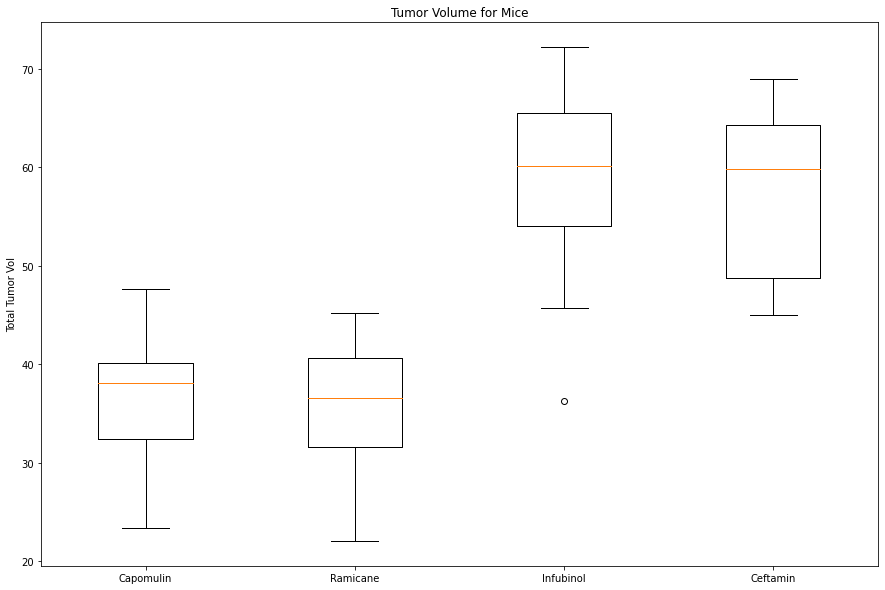

(10.0, 80.0)

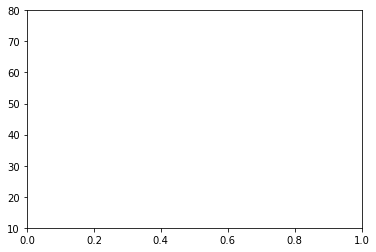

In [19]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = [drug1, drug2, drug3, drug4]
drugs = ["Capomulin", "Ramicane","Infubinol","Ceftamin"]
         
fig1, ax1 = plt.subplots(figsize=(15,10))
ax1.set_title('Tumor Volume for Mice')
ax1.set_ylabel('Total Tumor Vol')
ax1.boxplot(treatments, labels =drugs)
plt.show()
plt.ylim(10,80)
# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [20]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest



## Line and Scatter Plots

Text(0, 0.5, 'Volume')

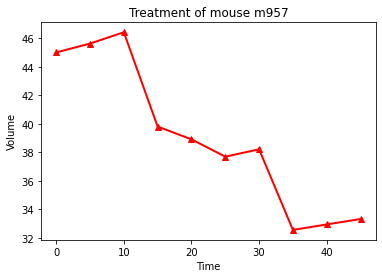

In [21]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_line = capomulin.loc[capomulin["Mouse ID"] == "m957",:]
x_axis = capomulin_line["Timepoint"]
line = capomulin_line["Tumor Volume (mm3)"]
fig1, ax1 = plt.subplots()
plt.title("Treatment of mouse m957")
plt.plot(x_axis, line,linewidth=2 ,marker="^",color="red")
plt.xlabel("Time")
plt.ylabel("Volume")

Text(0, 0.5, 'Volume')

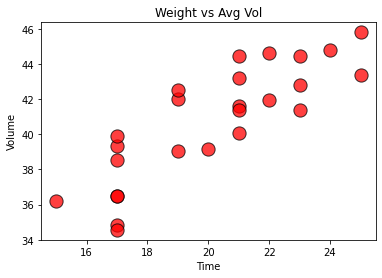

In [22]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_avg = capomulin.groupby(["Mouse ID"]).mean()

fig1, ax1 = plt.subplots()
plt.scatter(capomulin_avg["Weight (g)"], capomulin_avg["Tumor Volume (mm3)"], marker="o", facecolors="red", edgecolors="black",
            s=175, alpha=0.75)
plt.title("Weight vs Avg Vol")
plt.xlabel("Time")
plt.ylabel("Volume")

## Correlation and Regression

y = 0.95x + 21.55


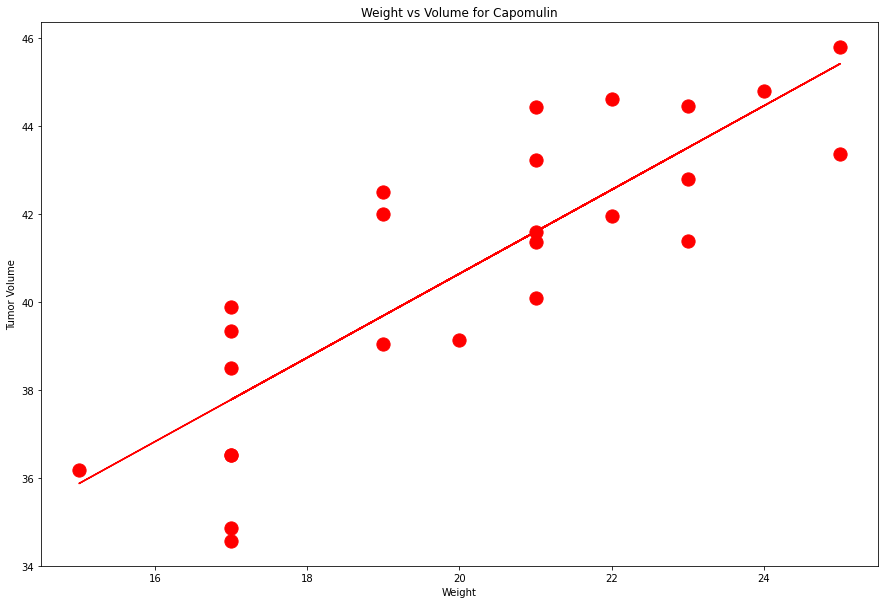

In [24]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr=round(st.pearsonr(capomulin_avg["Weight (g)"],capomulin_avg["Tumor Volume (mm3)"])[0],2)
x_values= capomulin_avg["Weight (g)"]
y_values= capomulin_avg["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
fig1, ax1 = plt.subplots(figsize=(15,10))
plt.scatter(x_values,y_values,s=175, color="red")
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Weight')
plt.ylabel('Tumor Volume')
plt.title("Weight vs Volume for Capomulin")

plt.show()

